# Identifying Pneumonina using Convolutional Neural Networks

- Student Name: Kevin Spring
- Student pace: Flex
- Scheduled Project Review: December 12, 2022
- Instructor name: Morgan Jones
- Blog Post

# Summary


# Table of Contents

# Introduction

# Methodology

## Data

In [1]:
# Download the data.zip file and unpack it into test-train split using python_splitter
import os
#from python_splitter import split_from_folder # https://github.com/bharatadk/python_splitter

# absolute path of unzipped data directory
PATH = os.path.join(os.path.abspath(os.getcwd()),'data/')
#split_from_folder(PATH, train = 0.8, test=0.2)

In [2]:
PATH

'/home/kevinspring/Documents/Flatiron/phase04/Pneumonia-detection-using-CNN/data/'

In [3]:
# Check class imbalance between pneumonia and normal x-ray
# folder path
dir_normal = os.path.join(PATH, 'NORMAL/')
dir_pneumonia = os.path.join(PATH, 'PNEUMONIA/')

# Iterate directory
def file_count(dir_path, class_name):
    count = 0
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    print(f'{class_name} file count: {count}')

file_count(dir_normal, 'Normal')
file_count(dir_pneumonia, 'Pneumonia')

Normal file count: 1583
Pneumonia file count: 4273


In [4]:
def file_count2(dir_path, class_name):
    count = 0
    for path in os.scandir(dir_path):
        if path.is_file():
            count += 1
    print(f'{class_name} file count: {count}')
    
file_count2(dir_normal, 'Normal')
file_count2(dir_pneumonia, 'Pneumonia')

Normal file count: 1583
Pneumonia file count: 4273


In [6]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())
print(device_lib.list_local_devices())
import keras
print(keras.__version__)

2.10.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 63082232913725109
xla_global_id: -1
]
2.10.0


2022-11-30 08:36:38.346939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
import os, shutil

data_path = os.path.join(os.path.abspath(os.getcwd()),'Train_Test_Folder/')
#data_path = os.path.join(os.path.abspath(os.getcwd()),'archive\\chest_xray')
print(data_path)

train_dir = os.path.join(data_path, 'train/')
test_dir = os.path.join(data_path, 'test/')
#val_dir = os.path.join(data_path, 'val\\')

train_normal = os.path.join(train_dir, 'NORMAL/')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA/')

/home/kevinspring/Documents/Flatiron/phase04/Pneumonia-detection-using-CNN/Train_Test_Folder/


Image number: 1266
normal picture title:  NORMAL2-IM-0272-0001.jpeg
pneumonia picture title: person1544_bacteria_4033.jpeg


Text(0.5, 1.0, 'Pneumonia')

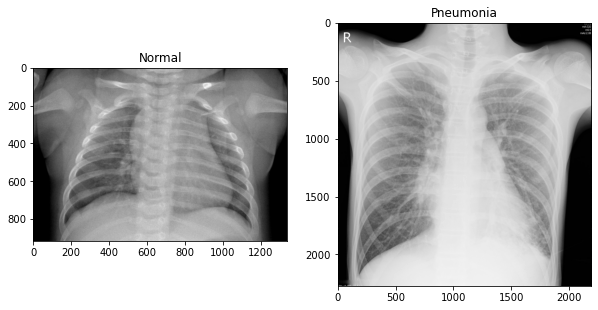

In [8]:
# Show a representative image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print(f'Image number: {len(os.listdir(train_normal))}')
rand_norm = np.random.randint(0, len(os.listdir(train_normal)))
norm_img = os.listdir(train_normal)[rand_norm]
print('normal picture title: ', norm_img)
norm_img_address = train_normal+norm_img

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_pneumonia)))

pneu_img =  os.listdir(train_pneumonia)[rand_norm]
pneu_img_address = train_pneumonia+pneu_img
print('pneumonia picture title:', pneu_img)

# Load the image
norm_load = Image.open(norm_img_address)
pneu_load = Image.open(pneu_img_address)

# Show the picture
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load, cmap='gray')
ax1.set_title('Normal')

ax2 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_load, cmap='gray')
ax2.set_title('Pneumonia')

In [9]:
# Import data into tensorflow Dataset object
from tensorflow.keras.utils import image_dataset_from_directory

In [50]:
img_height = 64
img_width = 64
rgb = 3
grayscale = 1
batch_size = 32

train_ds, val_ds = image_dataset_from_directory(train_dir,
                                        color_mode='grayscale',
                                        label_mode='binary',
                                        validation_split=0.2,
                                        subset='both',
                                        seed=42,
                                        #shuffle=False,
                                        image_size=(img_height, img_width),
                                        batch_size = batch_size)

#A possible issue is that Keras validation_split uses the "last x percent" 
# of data as validation data without shuffling the data. 
# So if your data has a certain stratification, this stratification will 
# affect the validation set.

test_ds = image_dataset_from_directory(test_dir,
                                       shuffle=False,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )

print('Batches for testing -->', test_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())
print('Batches for training -->', train_ds.cardinality())

# SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)



Found 4684 files belonging to 2 classes.
Using 3748 files for training.
Using 936 files for validation.
Found 1172 files belonging to 2 classes.
Batches for testing --> tf.Tensor(37, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(30, shape=(), dtype=int64)
Batches for training --> tf.Tensor(118, shape=(), dtype=int64)


In [23]:
org_dir = os.path.join(os.path.abspath(os.getcwd()),'chest_xray/')
org_dir_train = os.path.join(org_dir, 'train/')
org_dir_val = os.path.join(org_dir, 'val/')
org_dir_test = os.path.join(org_dir, 'test/')

train_org = image_dataset_from_directory(org_dir_train,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )
val_org = image_dataset_from_directory(org_dir_val,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )
test_org = image_dataset_from_directory(org_dir_test,
                                       color_mode='grayscale',
                                       label_mode='binary',
                                       image_size=(img_height, img_width)
                                      )

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [24]:
len(train_ds)

118

In [25]:
print(train_ds.class_names)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['NORMAL', 'PNEUMONIA']
(32, 64, 64, 1)
(32, 1)


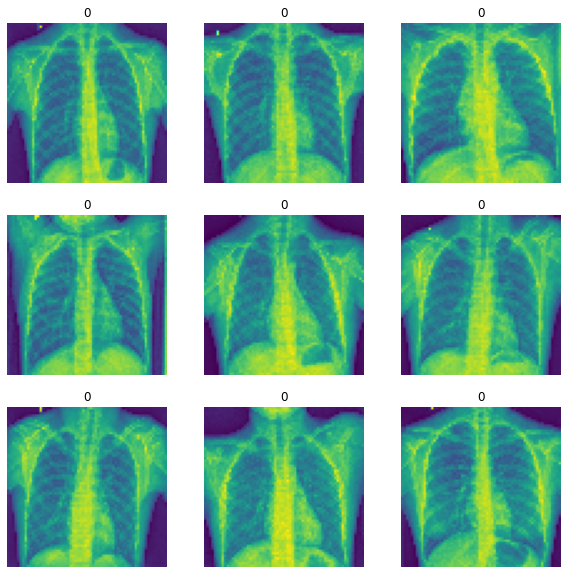

In [26]:
# Visualize the data

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

In [27]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

# Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. 
# This will ensure the dataset does not become a bottleneck while training your model.
# Dataset.prefetch overlaps data preprocessing and model execution while training.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
# libraries for neural networks
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Rescaling
from keras.metrics import SpecificityAtSensitivity

In [29]:
def plot_fun(model, epochs):
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'g-', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'g-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

#plot_fun(baseline_cnn_fit)
# Visualize training results
#plot_fun(cnn_model)

In [30]:
#import tensorflow.keras import layers

batch_size = 4
learning_rate = 0.0005

# Baseline model
inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_baseline = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model_baseline.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model_baseline.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='baseline_model.keras',
        save_best_only=True,
        monitor='val_loss')
]

# Fit model
epochs=30
model_baseline_fit = model_baseline.fit(train_ds,
                                        steps_per_epoch=len(train_ds),
                                         epochs=epochs,
                                         validation_data = val_ds,
                                         batch_size=batch_size,
                                         callbacks=callbacks)

plot_fun(model_baseline_fit, epochs)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       7385

KeyboardInterrupt: 

In [31]:
# Discussion
# 

In [34]:
# Model 2
inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model2.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model2.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='model2.keras',
        save_best_only=True,
        monitor='val_loss')
]

# Fit model
epochs=20
model2_fit = model2.fit(train_ds,
                        steps_per_epoch=len(train_ds),
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size,
                         callbacks=callbacks)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                      

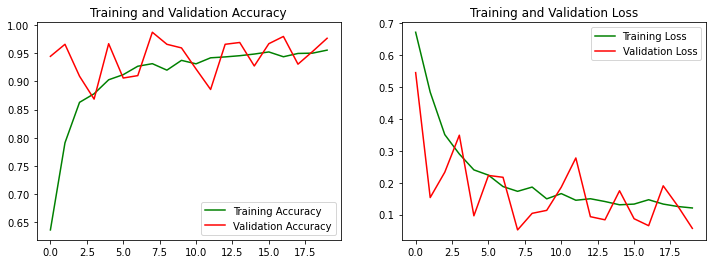

In [35]:
plot_fun(model2_fit, epochs)

In [ ]:
epochs = 10
model2_org_fit = model2.fit(train_org,
                                steps_per_epoch=len(train_org),
                                 epochs=epochs,
                                 validation_data = val_org,
                                 batch_size=batch_size,
                                 callbacks=callbacks)

plot_fun(model2_org_fit, epochs)

In [44]:
# Model 3
# Include a dropout
from keras.layers import Dropout

learning_rate = 0.001
batch_size=32

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model3.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model3.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='model3.keras',
        save_best_only=True,
        monitor='val_loss')
]


# Fit model
epochs=30
model3_fit = model3.fit(train_ds,
                        #steps_per_epoch=len(train_ds),
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size,
                         callbacks=callbacks)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                     

Epoch 24/30
118/118 [==============================] - 10s 82ms/step - loss: 0.1718 - accuracy: 0.9469 - recall_11: 0.9561 - specificity_at_sensitivity_11: 0.9968 - val_loss: 0.0900 - val_accuracy: 0.9605 - val_recall_11: 0.9605 - val_specificity_at_sensitivity_11: 0.0000e+00
Epoch 25/30
118/118 [==============================] - 10s 81ms/step - loss: 0.1526 - accuracy: 0.9525 - recall_11: 0.9649 - specificity_at_sensitivity_11: 0.9968 - val_loss: 0.1081 - val_accuracy: 0.9562 - val_recall_11: 0.9562 - val_specificity_at_sensitivity_11: 0.0000e+00
Epoch 26/30
118/118 [==============================] - 10s 84ms/step - loss: 0.1541 - accuracy: 0.9557 - recall_11: 0.9662 - specificity_at_sensitivity_11: 0.9976 - val_loss: 0.0594 - val_accuracy: 0.9733 - val_recall_11: 0.9733 - val_specificity_at_sensitivity_11: 0.0000e+00
Epoch 27/30
118/118 [==============================] - 9s 80ms/step - loss: 0.1510 - accuracy: 0.9578 - recall_11: 0.9641 - specificity_at_sensitivity_11: 0.9953 - val_l

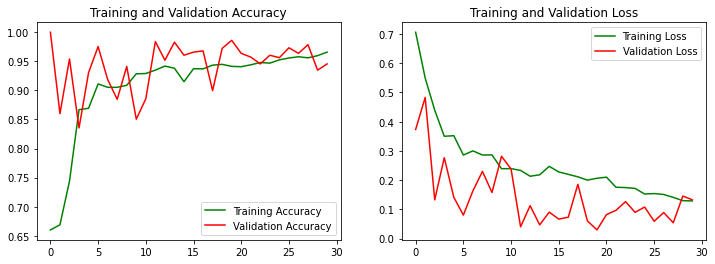

In [45]:
plot_fun(model3_fit, epochs)

In [ ]:
# Model 3 discussion
# Including a dropout layer does decrease the overfitting on the training data but validation
# accuracy starts at 100% and bounces around. This may be because there are not enough samples
# in the validation set. 
# In the next model I will augment the data by rotating, flipping, and zooming on the images

In [51]:
# Model 4: Data augmentation
from keras import layers

data_augmentation = Sequential(
        [
            layers.RandomFlip('horizontal'),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
        ])

from keras.layers import Dropout

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = data_augmentation(inputs)
#x = Dropout(0.1)(x)
x = Rescaling(1./255)(x)
x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the Neural network
model4.compile(optimizer = keras.optimizers.Adam(learning_rate), 
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy', 
                                   keras.metrics.Recall(),
                                   keras.metrics.SpecificityAtSensitivity(0.5)])

# Summary
model4.summary()

# Save only the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='model4.keras',
        save_best_only=True,
        monitor='val_loss')
]

# Fit model
epochs=20
batch_size = 8
model4_fit = model4.fit(train_ds,
                        steps_per_epoch=len(train_ds),
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 sequential_3 (Sequential)   (None, 64, 64, 1)         0         
                                                                 
 rescaling_13 (Rescaling)    (None, 64, 64, 1)         0         
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 64)        18496     
                                                          

Epoch 15/20
118/118 [==============================] - 21s 174ms/step - loss: 0.1607 - accuracy: 0.9402 - recall_15: 0.9622 - specificity_at_sensitivity_15: 0.9971 - val_loss: 0.1639 - val_accuracy: 0.9316 - val_recall_15: 0.9348 - val_specificity_at_sensitivity_15: 1.0000
Epoch 16/20
118/118 [==============================] - 21s 175ms/step - loss: 0.1483 - accuracy: 0.9461 - recall_15: 0.9674 - specificity_at_sensitivity_15: 1.0000 - val_loss: 0.2252 - val_accuracy: 0.9188 - val_recall_15: 0.9029 - val_specificity_at_sensitivity_15: 1.0000
Epoch 17/20
118/118 [==============================] - 22s 185ms/step - loss: 0.1335 - accuracy: 0.9493 - recall_15: 0.9688 - specificity_at_sensitivity_15: 0.9990 - val_loss: 0.1445 - val_accuracy: 0.9359 - val_recall_15: 0.9464 - val_specificity_at_sensitivity_15: 1.0000
Epoch 18/20
118/118 [==============================] - 21s 172ms/step - loss: 0.1379 - accuracy: 0.9517 - recall_15: 0.9703 - specificity_at_sensitivity_15: 0.9961 - val_loss: 0.

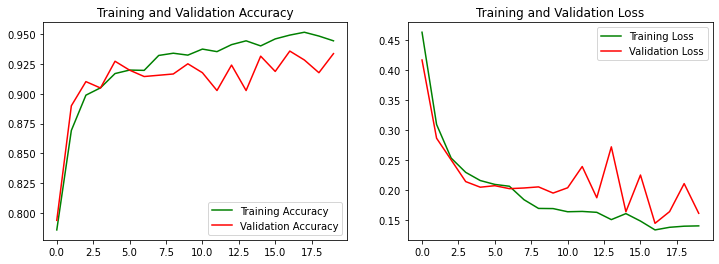

In [52]:
plot_fun(model4_fit, epochs)

In [ ]:
# Discussion 5 epochs

In [ ]:
model_aug.summary()

In [ ]:
# Model with transfer learning
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(img_height, img_width, rgb))

conv_base.summary()

In [ ]:
# Model 5
# With a pretrained model

inputs = keras.Input(shape=(img_height, img_width, grayscale))
x = data_augmentation(inputs)
x = Conv2D(3,(3,3), padding='same')(x)
x = keras.applications.vgg19.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model5 = keras.Model(inputs, outputs)

# Compile
model5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_data_augmentation.keras',
        save_best_only=True,
        monitor='val_loss')
]

model5_fit = model5.fit(train_ds,
                         epochs=epochs,
                         validation_data = val_ds,
                         batch_size=batch_size)

In [ ]:
plot_fun(model5_fit, epochs)

In [60]:
# Analyze models on test data

def model_evaluate(best_model, test_data):
    model = keras.models.load_model(best_model)
    test_loss, test_accuracy, test_recall, test_specificity = model.evaluate(test_data)
    print(f'Test accuracy of {best_model}: {test_accuracy:.3f}')

model_evaluate('baseline_model.keras', test_ds)
model_evaluate('model2.keras', test_ds)
model_evaluate('model3.keras', test_ds)
model_evaluate('model4.keras', test_ds)

37/37 [==============================] - 3s 68ms/step - loss: 0.1359 - accuracy: 0.9573 - recall: 0.9637 - specificity_at_sensitivity: 0.9874
Test accuracy of baseline_model.keras: 0.957
37/37 [==============================] - 3s 75ms/step - loss: 0.1912 - accuracy: 0.9206 - recall_5: 0.9825 - specificity_at_sensitivity_5: 1.0000
Test accuracy of model2.keras: 0.921
37/37 [==============================] - 3s 74ms/step - loss: 0.2272 - accuracy: 0.9198 - recall_11: 0.9848 - specificity_at_sensitivity_11: 0.9811
Test accuracy of model3.keras: 0.920
37/37 [==============================] - 3s 72ms/step - loss: 0.1747 - accuracy: 0.9761 - recall_48: 0.9988 - specificity_at_sensitivity_48: 0.9527
Test accuracy of model4.keras: 0.976


In [57]:
model3 = keras.models.load_model('model3.keras')
test_loss, test_accuracy, test_recall, test_specificity = model3.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.3f}')

37/37 [==============================] - 3s 67ms/step - loss: 0.2272 - accuracy: 0.9198 - recall_11: 0.9848 - specificity_at_sensitivity_11: 0.9811
Test accuracy: 0.920
